In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random

from surprise import Dataset
from surprise import Reader
from surprise import evaluate, print_perf
from surprise import KNNWithMeans
from surprise import BaselineOnly
from surprise import GridSearch
from surprise import accuracy

import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_csv('./ml-100k/data.csv')

In [69]:
reader = Reader(rating_scale=(0.5,5))

In [70]:
# (I) using dataset sort by time to for training and testing
df = df.sort_values(by='timestamp')
l = len(df)
train = df[:int(l*0.8)]
test = df[int(l*0.8):]
train_data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
train_data.split(n_folds=5)

In [71]:
# (II) train/test data from stratify sampling
X_train, X_test, y_train, t_test = train_test_split(df, df.rating, test_size=0.2)
Xtrain_data = Dataset.load_from_df(X_train[['userId', 'movieId', 'rating']], reader)
Xtrain_data.split(n_folds=5)

In [72]:
Xtest_data = Dataset.load_from_df(X_test[['userId', 'movieId', 'rating']], reader)

In [73]:
# (III) train/test data based on rating randomly shuffled 
data = pd.read_csv('./ml-100k/data.csv')
df = pd.DataFrame(data)
df.drop('timestamp', axis=1, inplace=True)
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
raw_ratings = dataset.raw_ratings
random.shuffle(raw_ratings)
threshold = int(.8 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]
dataset.raw_ratings = A_raw_ratings
dataset.split(n_folds=5)

# Baseline

In [9]:
algoBL = BaselineOnly()

In [13]:
perfBL = evaluate(algoBL, train_data, measures=['RMSE', 'MAE', 'FCP'])

Evaluating RMSE, MAE, FCP of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using als...
RMSE: 0.9307
MAE:  0.7357
FCP:  0.7072
------------
Fold 2
Estimating biases using als...
RMSE: 0.9434
MAE:  0.7461
FCP:  0.6967
------------
Fold 3
Estimating biases using als...
RMSE: 0.9452
MAE:  0.7485
FCP:  0.6883
------------
Fold 4
Estimating biases using als...
RMSE: 0.9541
MAE:  0.7560
FCP:  0.6934
------------
Fold 5
Estimating biases using als...
RMSE: 0.9360
MAE:  0.7432
FCP:  0.7009
------------
------------
Mean RMSE: 0.9419
Mean MAE : 0.7459
Mean FCP : 0.6973
------------
------------


In [11]:
perfBLX = evaluate(algoBL, Xtrain_data, measures=['RMSE', 'MAE', 'FCP'])

Evaluating RMSE, MAE, FCP of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using als...
RMSE: 0.9456
MAE:  0.7521
FCP:  0.6936
------------
Fold 2
Estimating biases using als...
RMSE: 0.9478
MAE:  0.7513
FCP:  0.6910
------------
Fold 3
Estimating biases using als...
RMSE: 0.9427
MAE:  0.7477
FCP:  0.6844
------------
Fold 4
Estimating biases using als...
RMSE: 0.9530
MAE:  0.7541
FCP:  0.6982
------------
Fold 5
Estimating biases using als...
RMSE: 0.9500
MAE:  0.7519
FCP:  0.6864
------------
------------
Mean RMSE: 0.9478
Mean MAE : 0.7514
Mean FCP : 0.6907
------------
------------


In [14]:
# using SGD (stochastic Gradient Descent)
algoBLsgd = BaselineOnly(bsl_options={'method':'sgd', 'learning_rate':0.01})

In [15]:
perfBLsgd = evaluate(algoBLsgd, train_data, measures=['RMSE', 'MAE', 'FCP'])

Evaluating RMSE, MAE, FCP of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using sgd...
RMSE: 0.9274
MAE:  0.7296
FCP:  0.7089
------------
Fold 2
Estimating biases using sgd...
RMSE: 0.9405
MAE:  0.7403
FCP:  0.6964
------------
Fold 3
Estimating biases using sgd...
RMSE: 0.9420
MAE:  0.7426
FCP:  0.6889
------------
Fold 4
Estimating biases using sgd...
RMSE: 0.9512
MAE:  0.7506
FCP:  0.6968
------------
Fold 5
Estimating biases using sgd...
RMSE: 0.9330
MAE:  0.7398
FCP:  0.7002
------------
------------
Mean RMSE: 0.9388
Mean MAE : 0.7406
Mean FCP : 0.6983
------------
------------


In [16]:
perfBLsgd = evaluate(algoBLsgd, Xtrain_data, measures=['RMSE', 'MAE', 'FCP'])

Evaluating RMSE, MAE, FCP of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using sgd...
RMSE: 0.9428
MAE:  0.7468
FCP:  0.6942
------------
Fold 2
Estimating biases using sgd...
RMSE: 0.9434
MAE:  0.7453
FCP:  0.6901
------------
Fold 3
Estimating biases using sgd...
RMSE: 0.9421
MAE:  0.7444
FCP:  0.6852
------------
Fold 4
Estimating biases using sgd...
RMSE: 0.9500
MAE:  0.7487
FCP:  0.6994
------------
Fold 5
Estimating biases using sgd...
RMSE: 0.9468
MAE:  0.7457
FCP:  0.6905
------------
------------
Mean RMSE: 0.9450
Mean MAE : 0.7462
Mean FCP : 0.6919
------------
------------


### grid_search - ALS

In [74]:
param_grid = {'bsl_options': {'method': ['als'],
                              'n_epochs': [10, 20, 50, 100],
                              'reg_u': [1, 5, 15, 100],
                              'reg_i': [1, 5, 10, 100]}
              }

In [75]:
grid_search = GridSearch(BaselineOnly, param_grid, measures = ['RMSE', 'MAE', 'FCP'])

[{'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 1}}, {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 5}}, {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 10}}, {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 100}}, {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 5, 'reg_i': 1}}, {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 5, 'reg_i': 5}}, {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 5, 'reg_i': 10}}, {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 5, 'reg_i': 100}}, {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 15, 'reg_i': 1}}, {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 15, 'reg_i': 5}}, {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 15, 'reg_i': 10}}, {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 15, 'reg_i': 100}}, {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 100, 'reg_i': 1

#### on training data split by time

In [74]:
grid_search.evaluate(train_data)

------------
Parameters combination 1 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 1}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.8956
Mean MAE : 0.6899
Mean FCP : 0.6659
------------
------------
Parameters combination 2 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 5}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.8944
Mean MAE : 0.6912
Mean FCP : 0.6660
------------
------------
Parameters combination 3 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 10}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases usi

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9000
Mean MAE : 0.6971
Mean FCP : 0.6638
------------
------------
Parameters combination 24 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 20, 'reg_u': 5, 'reg_i': 100}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9407
Mean MAE : 0.7338
Mean FCP : 0.6524
------------
------------
Parameters combination 25 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 20, 'reg_u': 15, 'reg_i': 1}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.8964
Mean MAE : 0.6912
Mean FCP : 0.6659
------------
------------
Parameters combination 26 of 64
params:  {'bsl_options': {'method': 'als', 'n_epoch

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9065
Mean MAE : 0.7021
Mean FCP : 0.6657
------------
------------
Parameters combination 47 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 50, 'reg_u': 100, 'reg_i': 10}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9118
Mean MAE : 0.7081
Mean FCP : 0.6640
------------
------------
Parameters combination 48 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 50, 'reg_u': 100, 'reg_i': 100}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9512
Mean MAE : 0.7488
Mean FCP : 0.6544
------------
------------
Parameters combination 49 of 64
params:  {'bsl_o

In [75]:
grid_search.best_score

CaseInsensitiveDefaultDict(list,
                           {'fcp': 0.66628020391233889,
                            'mae': 0.68988303001875528,
                            'rmse': 0.89409065019828338})

In [76]:
grid_search.best_params

CaseInsensitiveDefaultDict(list,
                           {'fcp': {'bsl_options': {'method': 'als',
                              'n_epochs': 100,
                              'reg_i': 1,
                              'reg_u': 1}},
                            'mae': {'bsl_options': {'method': 'als',
                              'n_epochs': 50,
                              'reg_i': 1,
                              'reg_u': 1}},
                            'rmse': {'bsl_options': {'method': 'als',
                              'n_epochs': 100,
                              'reg_i': 5,
                              'reg_u': 5}}})

In [77]:
result_df_bsl_als = pd.DataFrame.from_dict(grid_search.cv_results)
result_df_bsl_als

,RMSE,bsl_options,params,scores
0,0.895608,"{'method': 'als', 'n_epochs': 10, 'reg_u': 1, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.895607892452, 'MAE': 0.689921892744..."
1,0.894357,"{'method': 'als', 'n_epochs': 10, 'reg_u': 1, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.894356561982, 'MAE': 0.691243350544..."
2,0.900304,"{'method': 'als', 'n_epochs': 10, 'reg_u': 1, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.900304050428, 'MAE': 0.697045618196..."
3,0.941116,"{'method': 'als', 'n_epochs': 10, 'reg_u': 1, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.941116466837, 'MAE': 0.73360178798,..."
4,0.895445,"{'method': 'als', 'n_epochs': 10, 'reg_u': 5, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.895445276471, 'MAE': 0.690101145263..."
5,0.894159,"{'method': 'als', 'n_epochs': 10, 'reg_u': 5, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.894159022639, 'MAE': 0.691324960243..."
6,0.900062,"{'method': 'als', 'n_epochs': 10, 'reg_u': 5, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.90006224768, 'MAE': 0.697144429879,..."
7,0.940699,"{'method': 'als', 'n_epochs': 10, 'reg_u': 5, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.940699101067, 'MAE': 0.733840689281..."
8,0.896508,"{'method': 'als', 'n_epochs': 10, 'reg_u': 15,...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.896508201188, 'MAE': 0.691355684896..."
9,0.895101,"{'method': 'als', 'n_epochs': 10, 'reg_u': 15,...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.89510118551, 'MAE': 0.692429170068,..."


In [78]:
result_df_bsl_als.to_csv('BaselineOnly_als.csv')

#### on training data split randomly

In [48]:
grid_search.evaluate(Xtrain_data)

------------
Parameters combination 1 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 1}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9440
Mean MAE : 0.7442
Mean FCP : 0.6927
------------
------------
Parameters combination 2 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 5}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9442
Mean MAE : 0.7456
Mean FCP : 0.6925
------------
------------
Parameters combination 3 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 10}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases usi

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9463
Mean MAE : 0.7489
Mean FCP : 0.6912
------------
------------
Parameters combination 24 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 20, 'reg_u': 5, 'reg_i': 100}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9833
Mean MAE : 0.7849
Mean FCP : 0.6791
------------
------------
Parameters combination 25 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 20, 'reg_u': 15, 'reg_i': 1}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9446
Mean MAE : 0.7470
Mean FCP : 0.6927
------------
------------
Parameters combination 26 of 64
params:  {'bsl_options': {'method': 'als', 'n_epoch

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9623
Mean MAE : 0.7660
Mean FCP : 0.6916
------------
------------
Parameters combination 47 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 50, 'reg_u': 100, 'reg_i': 10}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9651
Mean MAE : 0.7691
Mean FCP : 0.6905
------------
------------
Parameters combination 48 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 50, 'reg_u': 100, 'reg_i': 100}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9994
Mean MAE : 0.8094
Mean FCP : 0.6788
------------
------------
Parameters combination 49 of 64
params:  {'bsl_o

In [49]:
grid_search.best_score

CaseInsensitiveDefaultDict(list,
                           {'fcp': 0.69306378544118208,
                            'mae': 0.74386148915089456,
                            'rmse': 0.94331767082581863})

In [50]:
grid_search.best_params

CaseInsensitiveDefaultDict(list,
                           {'fcp': {'bsl_options': {'method': 'als',
                              'n_epochs': 100,
                              'reg_i': 1,
                              'reg_u': 1}},
                            'mae': {'bsl_options': {'method': 'als',
                              'n_epochs': 100,
                              'reg_i': 1,
                              'reg_u': 1}},
                            'rmse': {'bsl_options': {'method': 'als',
                              'n_epochs': 100,
                              'reg_i': 1,
                              'reg_u': 5}}})

In [51]:
result_Xals = pd.DataFrame.from_dict(grid_search.cv_results)

In [53]:
result_Xals.sort_values(by='RMSE')

,RMSE,bsl_options,params,scores
52,0.943318,"{'method': 'als', 'n_epochs': 100, 'reg_u': 5,...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.943317670826, 'MAE': 0.744406875855..."
36,0.943320,"{'method': 'als', 'n_epochs': 50, 'reg_u': 5, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.943320103046, 'MAE': 0.744415753193..."
20,0.943355,"{'method': 'als', 'n_epochs': 20, 'reg_u': 5, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.943354767456, 'MAE': 0.744535265102..."
4,0.943416,"{'method': 'als', 'n_epochs': 10, 'reg_u': 5, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.943416026845, 'MAE': 0.744723542541..."
53,0.943460,"{'method': 'als', 'n_epochs': 100, 'reg_u': 5,...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.943459967582, 'MAE': 0.745605396084..."
37,0.943460,"{'method': 'als', 'n_epochs': 50, 'reg_u': 5, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.943460329614, 'MAE': 0.745606053252..."
21,0.943501,"{'method': 'als', 'n_epochs': 20, 'reg_u': 5, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.943500790529, 'MAE': 0.745678891712..."
5,0.943667,"{'method': 'als', 'n_epochs': 10, 'reg_u': 5, ...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.943667152557, 'MAE': 0.745968297761..."
49,0.943724,"{'method': 'als', 'n_epochs': 100, 'reg_u': 1,...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.943723854808, 'MAE': 0.74512125843,..."
48,0.943729,"{'method': 'als', 'n_epochs': 100, 'reg_u': 1,...","{'bsl_options': {'method': 'als', 'n_epochs': ...","{'RMSE': 0.943729070083, 'MAE': 0.743861489151..."


In [54]:
result_Xals.iloc[52]['params']

{'bsl_options': {'method': 'als', 'n_epochs': 100, 'reg_i': 1, 'reg_u': 5}}

In [55]:
result_Xals.iloc[36]['params']

{'bsl_options': {'method': 'als', 'n_epochs': 50, 'reg_i': 1, 'reg_u': 5}}

In [56]:
result_Xals.iloc[20]['params']

{'bsl_options': {'method': 'als', 'n_epochs': 20, 'reg_i': 1, 'reg_u': 5}}

#### on train/test dataset

In [77]:
grid_search.evaluate(dataset)

------------
Parameters combination 1 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 1}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9442
Mean MAE : 0.7446
Mean FCP : 0.6908
------------
------------
Parameters combination 2 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 5}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9443
Mean MAE : 0.7460
Mean FCP : 0.6896
------------
------------
Parameters combination 3 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 10, 'reg_u': 1, 'reg_i': 10}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases usi

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9463
Mean MAE : 0.7493
Mean FCP : 0.6880
------------
------------
Parameters combination 24 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 20, 'reg_u': 5, 'reg_i': 100}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9831
Mean MAE : 0.7850
Mean FCP : 0.6748
------------
------------
Parameters combination 25 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 20, 'reg_u': 15, 'reg_i': 1}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9447
Mean MAE : 0.7475
Mean FCP : 0.6907
------------
------------
Parameters combination 26 of 64
params:  {'bsl_options': {'method': 'als', 'n_epoch

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9616
Mean MAE : 0.7661
Mean FCP : 0.6890
------------
------------
Parameters combination 47 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 50, 'reg_u': 100, 'reg_i': 10}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9643
Mean MAE : 0.7692
Mean FCP : 0.6871
------------
------------
Parameters combination 48 of 64
params:  {'bsl_options': {'method': 'als', 'n_epochs': 50, 'reg_u': 100, 'reg_i': 100}}
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
------------
Mean RMSE: 0.9986
Mean MAE : 0.8090
Mean FCP : 0.6746
------------
------------
Parameters combination 49 of 64
params:  {'bsl_o

In [78]:
algo = grid_search.best_estimator['RMSE']

In [79]:
# retrain on the whole set A
trainset = dataset.build_full_trainset()
algo.train(trainset)

Estimating biases using als...


In [82]:
# Compute biased accuracy on A
predictions = algo.test(trainset.build_testset())
print('Biased accuracy on A,', end='   ')
accuracy.rmse(predictions)

Biased accuracy on A,   RMSE: 0.9103


0.91025927128831285

In [84]:
# Compute unbiased accuracy on B
testset = dataset.construct_testset(B_raw_ratings)  # testset is now the set B
predictions = algo.test(testset)
print('Unbiased accuracy on B,', end=' ')
accuracy.rmse(predictions)

Unbiased accuracy on B, RMSE: 0.9452


0.94517482828390287

### grid_search - SGD

In [85]:
param_grid = {'bsl_options': {'method': ['sgd'],
                              'reg': [0.01, 0.02, 0.05, 0.1],
                              'learning_rate': [0.001, 0.005, 0.01],
                              'n_epochs': [10, 20, 50, 100]}
              }

In [86]:
grid_search = GridSearch(BaselineOnly, param_grid, measures = ['RMSE', 'MAE', 'FCP'])

[{'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 10}}, {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 20}}, {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 50}}, {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 100}}, {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.005, 'n_epochs': 10}}, {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.005, 'n_epochs': 20}}, {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.005, 'n_epochs': 50}}, {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.005, 'n_epochs': 100}}, {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.01, 'n_epochs': 10}}, {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.01, 'n_epochs': 20}}, {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.01, 'n_epochs': 50}}, {'bsl_options': {'met

#### use train data split by time

In [87]:
grid_search.evaluate(train_data)

------------
Parameters combination 1 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 10}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9427
Mean MAE : 0.7372
Mean FCP : 0.6529
------------
------------
Parameters combination 2 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 20}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9242
Mean MAE : 0.7183
Mean FCP : 0.6543
------------
------------
Parameters combination 3 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 50}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating bia

------------
Mean RMSE: 0.8952
Mean MAE : 0.6902
Mean FCP : 0.6649
------------
------------
Parameters combination 23 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.02, 'learning_rate': 0.01, 'n_epochs': 50}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.8974
Mean MAE : 0.6909
Mean FCP : 0.6653
------------
------------
Parameters combination 24 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.02, 'learning_rate': 0.01, 'n_epochs': 100}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9026
Mean MAE : 0.6939
Mean FCP : 0.6637
------------
------------
Parameters combination 25 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.05, 'learning_rate': 0.001, 'n_epochs': 10}}
Estimating biases using s

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.8962
Mean MAE : 0.6910
Mean FCP : 0.6642
------------
------------
Parameters combination 45 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.1, 'learning_rate': 0.01, 'n_epochs': 10}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.8998
Mean MAE : 0.6953
Mean FCP : 0.6622
------------
------------
Parameters combination 46 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.1, 'learning_rate': 0.01, 'n_epochs': 20}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.8960
Mean MAE : 0.6915
Mean FCP : 0.6644
------------
------------
Parameters combination 47 of 48
params:  {'bsl_options': {'metho

In [88]:
grid_search.best_score

CaseInsensitiveDefaultDict(list,
                           {'fcp': 0.66579153968188753,
                            'mae': 0.68942468456911077,
                            'rmse': 0.89426282518260725})

In [89]:
grid_search.best_params

CaseInsensitiveDefaultDict(list,
                           {'fcp': {'bsl_options': {'learning_rate': 0.005,
                              'method': 'sgd',
                              'n_epochs': 100,
                              'reg': 0.01}},
                            'mae': {'bsl_options': {'learning_rate': 0.005,
                              'method': 'sgd',
                              'n_epochs': 50,
                              'reg': 0.02}},
                            'rmse': {'bsl_options': {'learning_rate': 0.005,
                              'method': 'sgd',
                              'n_epochs': 50,
                              'reg': 0.02}}})

In [90]:
result_df_bsl_sgd = pd.DataFrame.from_dict(grid_search.cv_results)
result_df_bsl_sgd

,RMSE,bsl_options,params,scores
0,0.942702,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.942702415756, 'MAE': 0.737206537395..."
1,0.924242,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.924241948845, 'MAE': 0.718287803884..."
2,0.905585,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.905584632441, 'MAE': 0.700958761479..."
3,0.897164,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.897163533899, 'MAE': 0.693158900354..."
4,0.906019,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.906019465755, 'MAE': 0.700831952497..."
5,0.897593,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.897592828965, 'MAE': 0.693109242597..."
6,0.894336,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.894336370574, 'MAE': 0.689431406927..."
7,0.896739,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.896738939182, 'MAE': 0.690478181875..."
8,0.898471,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.898470773845, 'MAE': 0.693514809023..."
9,0.895259,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.895258958428, 'MAE': 0.690202609915..."


In [91]:
result_df_bsl_sgd.to_csv('BaselineOnly_sgd.csv')

#### use train data split randomly

In [27]:
grid_search.evaluate(Xtrain_data)

------------
Parameters combination 1 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 10}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9859
Mean MAE : 0.7898
Mean FCP : 0.6760
------------
------------
Parameters combination 2 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 20}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9647
Mean MAE : 0.7665
Mean FCP : 0.6816
------------
------------
Parameters combination 3 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 50}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating bia

------------
Mean RMSE: 0.9450
Mean MAE : 0.7462
Mean FCP : 0.6919
------------
------------
Parameters combination 23 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.02, 'learning_rate': 0.01, 'n_epochs': 50}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9458
Mean MAE : 0.7464
Mean FCP : 0.6920
------------
------------
Parameters combination 24 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.02, 'learning_rate': 0.01, 'n_epochs': 100}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9467
Mean MAE : 0.7468
Mean FCP : 0.6919
------------
------------
Parameters combination 25 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.05, 'learning_rate': 0.001, 'n_epochs': 10}}
Estimating biases using s

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9451
Mean MAE : 0.7484
Mean FCP : 0.6917
------------
------------
Parameters combination 45 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.1, 'learning_rate': 0.01, 'n_epochs': 10}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9476
Mean MAE : 0.7517
Mean FCP : 0.6900
------------
------------
Parameters combination 46 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.1, 'learning_rate': 0.01, 'n_epochs': 20}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9462
Mean MAE : 0.7499
Mean FCP : 0.6909
------------
------------
Parameters combination 47 of 48
params:  {'bsl_options': {'metho

In [28]:
grid_search.best_score

CaseInsensitiveDefaultDict(list,
                           {'fcp': 0.69251965416663919,
                            'mae': 0.744628029186299,
                            'rmse': 0.94412376017617561})

In [29]:
grid_search.best_params

CaseInsensitiveDefaultDict(list,
                           {'fcp': {'bsl_options': {'learning_rate': 0.005,
                              'method': 'sgd',
                              'n_epochs': 100,
                              'reg': 0.01}},
                            'mae': {'bsl_options': {'learning_rate': 0.005,
                              'method': 'sgd',
                              'n_epochs': 50,
                              'reg': 0.01}},
                            'rmse': {'bsl_options': {'learning_rate': 0.005,
                              'method': 'sgd',
                              'n_epochs': 50,
                              'reg': 0.02}}})

In [39]:
result_Xsgd = pd.DataFrame.from_dict(grid_search.cv_results)

In [40]:
result_Xsgd.sort_values(by='RMSE')

,RMSE,bsl_options,params,scores
18,0.944124,"{'method': 'sgd', 'reg': 0.02, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.02,...","{'RMSE': 0.944123760176, 'MAE': 0.744987270583..."
6,0.944175,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.944174897607, 'MAE': 0.744628029186..."
30,0.944211,"{'method': 'sgd', 'reg': 0.05, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.05,...","{'RMSE': 0.944211232235, 'MAE': 0.746177863772..."
3,0.944460,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.944460371471, 'MAE': 0.745336765919..."
15,0.944503,"{'method': 'sgd', 'reg': 0.02, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.02,...","{'RMSE': 0.944503427208, 'MAE': 0.745740392605..."
31,0.944711,"{'method': 'sgd', 'reg': 0.05, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.05,...","{'RMSE': 0.944710944289, 'MAE': 0.746327126873..."
19,0.944814,"{'method': 'sgd', 'reg': 0.02, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.02,...","{'RMSE': 0.944814002938, 'MAE': 0.745291106202..."
27,0.944836,"{'method': 'sgd', 'reg': 0.05, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.05,...","{'RMSE': 0.944836333297, 'MAE': 0.74705924457,..."
5,0.944839,"{'method': 'sgd', 'reg': 0.01, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.01,...","{'RMSE': 0.944838847651, 'MAE': 0.746042276154..."
17,0.944902,"{'method': 'sgd', 'reg': 0.02, 'learning_rate'...","{'bsl_options': {'method': 'sgd', 'reg': 0.02,...","{'RMSE': 0.944902159431, 'MAE': 0.746459835766..."


In [41]:
result_Xsgd.iloc[18]['params']

{'bsl_options': {'learning_rate': 0.005,
  'method': 'sgd',
  'n_epochs': 50,
  'reg': 0.02}}

In [42]:
result_Xsgd.iloc[6]['params']

{'bsl_options': {'learning_rate': 0.005,
  'method': 'sgd',
  'n_epochs': 50,
  'reg': 0.01}}

#### use train/test dataset

In [87]:
grid_search.evaluate(dataset)

------------
Parameters combination 1 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 10}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9850
Mean MAE : 0.7895
Mean FCP : 0.6722
------------
------------
Parameters combination 2 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 20}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9642
Mean MAE : 0.7667
Mean FCP : 0.6777
------------
------------
Parameters combination 3 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.01, 'learning_rate': 0.001, 'n_epochs': 50}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating bia

------------
Mean RMSE: 0.9446
Mean MAE : 0.7461
Mean FCP : 0.6902
------------
------------
Parameters combination 23 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.02, 'learning_rate': 0.01, 'n_epochs': 50}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9455
Mean MAE : 0.7462
Mean FCP : 0.6910
------------
------------
Parameters combination 24 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.02, 'learning_rate': 0.01, 'n_epochs': 100}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9464
Mean MAE : 0.7467
Mean FCP : 0.6910
------------
------------
Parameters combination 25 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.05, 'learning_rate': 0.001, 'n_epochs': 10}}
Estimating biases using s

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9452
Mean MAE : 0.7487
Mean FCP : 0.6903
------------
------------
Parameters combination 45 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.1, 'learning_rate': 0.01, 'n_epochs': 10}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9471
Mean MAE : 0.7517
Mean FCP : 0.6881
------------
------------
Parameters combination 46 of 48
params:  {'bsl_options': {'method': 'sgd', 'reg': 0.1, 'learning_rate': 0.01, 'n_epochs': 20}}
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
------------
Mean RMSE: 0.9458
Mean MAE : 0.7498
Mean FCP : 0.6895
------------
------------
Parameters combination 47 of 48
params:  {'bsl_options': {'metho

In [88]:
algo = grid_search.best_estimator['RMSE']

In [89]:
# retrain on the whole set A
trainset = dataset.build_full_trainset()
algo.train(trainset)

Estimating biases using sgd...


In [90]:
# Compute biased accuracy on A
predictions = algo.test(trainset.build_testset())
print('Biased accuracy on A,', end='   ')
accuracy.rmse(predictions)

Biased accuracy on A,   RMSE: 0.9112


0.91121458536846478

In [91]:
# Compute unbiased accuracy on B
testset = dataset.construct_testset(B_raw_ratings)  # testset is now the set B
predictions = algo.test(testset)
print('Unbiased accuracy on B,', end=' ')
accuracy.rmse(predictions)

Unbiased accuracy on B, RMSE: 0.9449


0.94487074136462235

# KNNWithMeans

In [49]:
algoKNNmeans = KNNWithMeans(k=40)

## (I) with time-sort training data

In [50]:
perf = evaluate(algoKNNmeans, train_data, measures=['RMSE', 'MAE', 'FCP'])

Evaluating RMSE, MAE, FCP of algorithm KNNWithMeans.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9240
MAE:  0.7098
FCP:  0.6468
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9274
MAE:  0.7096
FCP:  0.6456
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9215
MAE:  0.7056
FCP:  0.6528
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9410
MAE:  0.7220
FCP:  0.6483
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9212
MAE:  0.7040
FCP:  0.6494
------------
------------
Mean RMSE: 0.9270
Mean MAE : 0.7102
Mean FCP : 0.6486
------------
------------


### (Ia) Grid Search - k nearest-neighbors from 10 to 100 with interval 10

In [15]:
param_grid_k = {'k': range(10,110,10)}
grid_search_k = GridSearch(KNNWithMeans, param_grid_k, measures = ['RMSE', 'MAE', 'FCP'])
grid_search_k.evaluate(train_data)

[{'k': 10}, {'k': 20}, {'k': 30}, {'k': 40}, {'k': 50}, {'k': 60}, {'k': 70}, {'k': 80}, {'k': 90}, {'k': 100}]
------------
Parameters combination 1 of 10
params:  {'k': 10}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9370
Mean MAE : 0.7216
Mean FCP : 0.6452
------------
------------
Parameters combination 2 of 10
params:  {'k': 20}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similar

In [16]:
grid_search_k.best_score

CaseInsensitiveDefaultDict(list,
                           {'fcp': 0.65268086201250086,
                            'mae': 0.70989527131474606,
                            'rmse': 0.92546373329786236})

In [17]:
grid_search_k.best_params

CaseInsensitiveDefaultDict(list,
                           {'fcp': {'k': 90},
                            'mae': {'k': 50},
                            'rmse': {'k': 40}})

In [79]:
result_df_k = pd.DataFrame.from_dict(grid_search_k.cv_results)
result_df_k

,RMSE,k,params,scores
0,0.936996,10,{'k': 10},"{'RMSE': 0.936996234185, 'MAE': 0.721645671766..."
1,0.927337,20,{'k': 20},"{'RMSE': 0.927337370038, 'MAE': 0.712419879648..."
2,0.925598,30,{'k': 30},"{'RMSE': 0.925597622439, 'MAE': 0.710214213144..."
3,0.925464,40,{'k': 40},"{'RMSE': 0.925463733298, 'MAE': 0.709937904296..."
4,0.925571,50,{'k': 50},"{'RMSE': 0.925570723612, 'MAE': 0.709895271315..."
5,0.925760,60,{'k': 60},"{'RMSE': 0.925759933737, 'MAE': 0.709986077252..."
6,0.926026,70,{'k': 70},"{'RMSE': 0.926026300534, 'MAE': 0.710137060325..."
7,0.926289,80,{'k': 80},"{'RMSE': 0.92628921246, 'MAE': 0.710319764098,..."
8,0.926491,90,{'k': 90},"{'RMSE': 0.926491428013, 'MAE': 0.710512343611..."
9,0.926614,100,{'k': 100},"{'RMSE': 0.926614350979, 'MAE': 0.710625807425..."


In [80]:
result_df_k.to_csv("KNNMeans_k.csv")

### Accuracy plot

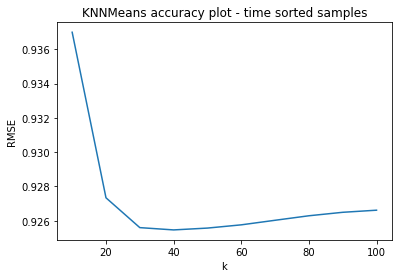

In [19]:
plt.plot(result_df_k['k'], result_df_k['RMSE'])
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('KNNMeans accuracy plot - time sorted samples')

### (Ib) Grid Search - multiple hyper parameters 

In [96]:
param_grid = {'k': [30, 40, 50],
              'sim_options': {'name': ['msd', 'cosine', 'pearson'],
                              'min_support': [1, 5],
                              'user_based': [False]}
              }

In [97]:
grid_search = GridSearch(KNNWithMeans, param_grid, measures = ['RMSE', 'MAE', 'FCP'])

[{'k': 30, 'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}, {'k': 30, 'sim_options': {'name': 'msd', 'min_support': 5, 'user_based': False}}, {'k': 30, 'sim_options': {'name': 'cosine', 'min_support': 1, 'user_based': False}}, {'k': 30, 'sim_options': {'name': 'cosine', 'min_support': 5, 'user_based': False}}, {'k': 30, 'sim_options': {'name': 'pearson', 'min_support': 1, 'user_based': False}}, {'k': 30, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_based': False}}, {'k': 40, 'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}, {'k': 40, 'sim_options': {'name': 'msd', 'min_support': 5, 'user_based': False}}, {'k': 40, 'sim_options': {'name': 'cosine', 'min_support': 1, 'user_based': False}}, {'k': 40, 'sim_options': {'name': 'cosine', 'min_support': 5, 'user_based': False}}, {'k': 40, 'sim_options': {'name': 'pearson', 'min_support': 1, 'user_based': False}}, {'k': 40, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_base

In [98]:
grid_search.evaluate(train_data)

------------
Parameters combination 1 of 18
params:  {'k': 30, 'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9249
Mean MAE : 0.7104
Mean FCP : 0.6464
------------
------------
Parameters combination 2 of 18
params:  {'k': 30, 'sim_options': {'name': 'msd', 'min_support': 5, 'user_based': False}}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity mat

/Users/chinwen/anaconda/envs/personlization/lib/python3.6/site-packages/surprise/prediction_algorithms/algo_base.py:231: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9354
Mean MAE : 0.7188
Mean FCP : 0.6475
------------
------------
Parameters combination 4 of 18
params:  {'k': 30, 'sim_options': {'name': 'cosine', 'min_support': 5, 'user_based': False}}
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9366
Mean MAE : 0.7142
Mean FCP : 0.654

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9334
Mean MAE : 0.7112
Mean FCP : 0.6524
------------
------------
Parameters combination 18 of 18
params:  {'k': 50, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_based': False}}
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
-----------

In [99]:
grid_search.best_params

CaseInsensitiveDefaultDict(list,
                           {'fcp': {'k': 50,
                             'sim_options': {'min_support': 5,
                              'name': 'msd',
                              'user_based': False}},
                            'mae': {'k': 50,
                             'sim_options': {'min_support': 1,
                              'name': 'msd',
                              'user_based': False}},
                            'rmse': {'k': 50,
                             'sim_options': {'min_support': 1,
                              'name': 'msd',
                              'user_based': False}}})

In [100]:
grid_search.best_score

CaseInsensitiveDefaultDict(list,
                           {'fcp': 0.65799974484373136,
                            'mae': 0.70553920847201679,
                            'rmse': 0.91990930545696981})

In [101]:
results_dfKNNmeansmGS = pd.DataFrame.from_dict(grid_search.cv_results)
results_dfKNNmeansmGS.head()

,MAE,RMSE,k,params,scores,sim_options
0,0.710369,0.924899,30,"{'k': 30, 'sim_options': {'name': 'msd', 'min_...","{'RMSE': 0.924899169907, 'MAE': 0.710369242297...","{'name': 'msd', 'min_support': 1, 'user_based'..."
1,0.709394,0.931891,30,"{'k': 30, 'sim_options': {'name': 'msd', 'min_...","{'RMSE': 0.931891364224, 'MAE': 0.709394324686...","{'name': 'msd', 'min_support': 5, 'user_based'..."
2,0.718850,0.935381,30,"{'k': 30, 'sim_options': {'name': 'cosine', 'm...","{'RMSE': 0.935380567532, 'MAE': 0.718849772607...","{'name': 'cosine', 'min_support': 1, 'user_bas..."
3,0.714170,0.936559,30,"{'k': 30, 'sim_options': {'name': 'cosine', 'm...","{'RMSE': 0.936558862062, 'MAE': 0.714170386214...","{'name': 'cosine', 'min_support': 5, 'user_bas..."
4,0.715019,0.937559,30,"{'k': 30, 'sim_options': {'name': 'pearson', '...","{'RMSE': 0.937558655574, 'MAE': 0.7150191569, ...","{'name': 'pearson', 'min_support': 1, 'user_ba..."


In [ ]:
results_dfKNNmeansmGS.to_csv('KNNmeans_multiGS.csv')

## (II) with stratified samping data

In [43]:
perf = evaluate(algoKNNmeans, Xtrain_data, measures=['RMSE', 'MAE', 'FCP'])

Evaluating RMSE, MAE, FCP of algorithm KNNWithMeans.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9375
MAE:  0.7181
FCP:  0.6279
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9419
MAE:  0.7210
FCP:  0.6250
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9244
MAE:  0.7061
FCP:  0.6282
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9269
MAE:  0.7090
FCP:  0.6279
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9272
MAE:  0.7117
FCP:  0.6241
------------
------------
Mean RMSE: 0.9316
Mean MAE : 0.7132
Mean FCP : 0.6266
------------
------------


### Grid Search - k nearest-neighbors from 10 to 100 with interval 10

In [27]:
param_grid_k = {'k': range(10,110,10)}
grid_search_kX = GridSearch(KNNWithMeans, param_grid_k, measures = ['RMSE', 'MAE', 'FCP'])
grid_search_kX.evaluate(Xtrain_data)

[{'k': 10}, {'k': 20}, {'k': 30}, {'k': 40}, {'k': 50}, {'k': 60}, {'k': 70}, {'k': 80}, {'k': 90}, {'k': 100}]
------------
Parameters combination 1 of 10
params:  {'k': 10}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9423
Mean MAE : 0.7233
Mean FCP : 0.6200
------------
------------
Parameters combination 2 of 10
params:  {'k': 20}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similar

In [105]:
%%time
grid_search_kX.best_score

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.39 µs


CaseInsensitiveDefaultDict(list,
                           {'fcp': 0.62986310684873437,
                            'mae': 0.71045054538112662,
                            'rmse': 0.92876074466919278})

In [29]:
grid_search_kX.best_params

CaseInsensitiveDefaultDict(list,
                           {'fcp': {'k': 60},
                            'mae': {'k': 60},
                            'rmse': {'k': 40}})

In [30]:
result_df_kX = pd.DataFrame.from_dict(grid_search_kX.cv_results)
result_df_kX

,RMSE,k,params,scores
0,0.942292,10,{'k': 10},"{'RMSE': 0.942292081538, 'MAE': 0.723303703311..."
1,0.931813,20,{'k': 20},"{'RMSE': 0.93181330847, 'MAE': 0.713650534769,..."
2,0.929307,30,{'k': 30},"{'RMSE': 0.929307439824, 'MAE': 0.711151632575..."
3,0.928761,40,{'k': 40},"{'RMSE': 0.928760744669, 'MAE': 0.710557342616..."
4,0.928801,50,{'k': 50},"{'RMSE': 0.928800537482, 'MAE': 0.710494580839..."
5,0.928894,60,{'k': 60},"{'RMSE': 0.92889350606, 'MAE': 0.710450545381,..."
6,0.929124,70,{'k': 70},"{'RMSE': 0.929123647548, 'MAE': 0.710639887145..."
7,0.929203,80,{'k': 80},"{'RMSE': 0.929203174958, 'MAE': 0.710669305535..."
8,0.929294,90,{'k': 90},"{'RMSE': 0.929294163565, 'MAE': 0.71074755394,..."
9,0.929395,100,{'k': 100},"{'RMSE': 0.929394922298, 'MAE': 0.710830275404..."


### Accuracy plot

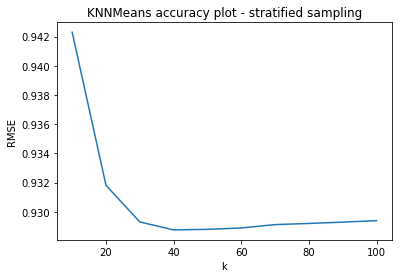

In [31]:
plt.plot(result_df_kX['k'], result_df_kX['RMSE'])
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('KNNMeans accuracy plot - stratified sampling')